# TP_Clustering

##### Imports

In [41]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from matplotlib import cm
import pysubgroup as ps
import apyori as ap
import mlxtend as mlx
warnings.filterwarnings('ignore')

##### Chargement des données

In [5]:
datas = pd.read_csv('./flickr_data.csv', sep=',', error_bad_lines=False)
X = datas.values
datas.head(4)

b'Skipping line 1555: expected 16 fields, saw 17\nSkipping line 3691: expected 16 fields, saw 17\n'
b'Skipping line 74107: expected 16 fields, saw 18\nSkipping line 74108: expected 16 fields, saw 18\nSkipping line 75320: expected 16 fields, saw 17\nSkipping line 75323: expected 16 fields, saw 17\nSkipping line 78506: expected 16 fields, saw 17\nSkipping line 78516: expected 16 fields, saw 17\nSkipping line 78517: expected 16 fields, saw 17\nSkipping line 78518: expected 16 fields, saw 17\nSkipping line 78519: expected 16 fields, saw 17\nSkipping line 78520: expected 16 fields, saw 17\nSkipping line 80008: expected 16 fields, saw 17\nSkipping line 81821: expected 16 fields, saw 17\n'


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
0,22653655033,77161041@N00,45.768121,4.801776,"square,sierra,squareformat,iphoneography,insta...",Enfin. #instabeer #beer #chimay #apero,46,18,24,11,2015,46,18,24,11,2015
1,22884818287,113280318@N03,45.759700,4.842200,"square,squareformat,iphoneography,instagramapp...",https://www.facebook.com/PascalFrontiPhotograp...,3,17,24,11,2015,3,17,24,11,2015
2,23277598065,132999708@N08,46.027633,4.699855,NaN,compagnons_dev_arnas20 (1),0,15,7,11,2015,50,15,24,11,2015
3,22883485267,132999708@N08,46.027572,4.699966,NaN,compagnons_dev_arnas20 (3),1,15,7,11,2015,50,15,24,11,2015


### Prétraitements

In [6]:
print(datas.shape)
datas = datas.drop_duplicates()
print(datas.shape)

datas.columns = datas.columns.str.replace(' ','')

"""
datas_numpy = datas.values
tags = datas["tags"]
X=[]

for index in range(0,len(tags)):
    #print(index)
    try :
        line = str(tags[index]).split(",")
    except KeyError: 
        continue
    else :
        if "lyon" in line:
            X.append(datas_numpy[index])
X = np.array(X)
datas = pd.DataFrame(data=X, columns=datas.columns)
"""
datas = datas[datas.long > 4.7821]
datas = datas[datas.long < 4.8929]
datas = datas[datas.lat > 45.7261]
datas = datas[datas.lat < 45.7855]
print(datas.shape)

(83837, 16)
(15202, 16)
(9687, 16)


In [7]:
BBox = ((datas.long.min(), datas.long.max(), datas.lat.min(), datas.lat.max()))
print(BBox)

(4.782603, 4.890663, 45.726411, 45.785472)


#### La Visualisation

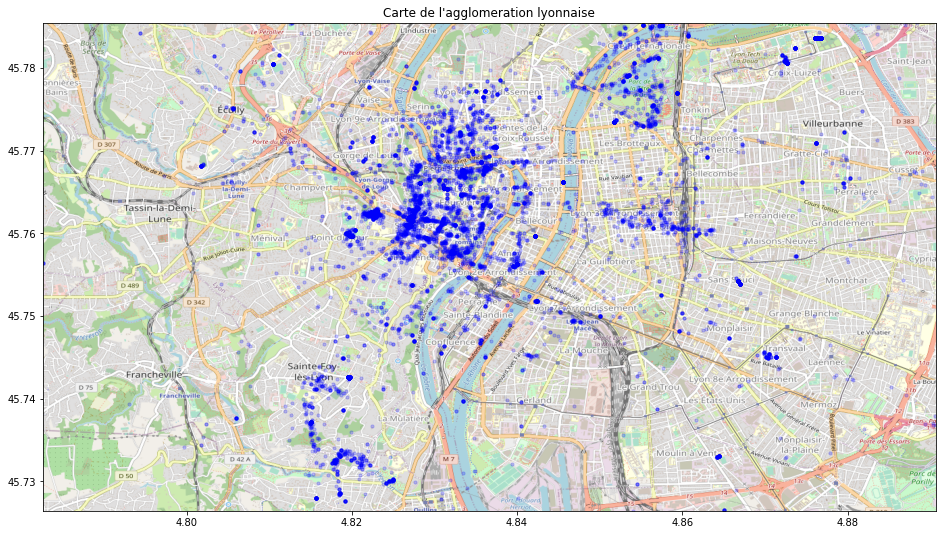

In [8]:
carte = plt.imread('./smaller_map.png')
fig, ax = plt.subplots(figsize = (16,14))
ax.scatter(datas.long, datas.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Carte de l\'agglomeration lyonnaise')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(carte, zorder=0, extent = BBox, aspect= 'equal')

#### Le clustering

> On ne peut pas utiliser les K-Means, on ne connait pas le nombre de clusters. On va utiliser un algorithme qui se base sur la densité : DBSCAN.

In [35]:
dbscan = DBSCAN(eps=0.001, min_samples=10)
lat = datas.iloc[:,2:3].values
long = datas.iloc[:,3:4].values
locations = datas.iloc[:,2:4].values
print(locations.shape)
clustering = dbscan.fit(locations)
print(clustering.labels_)

(9687, 2)
[ 0  1  2  3  4  4  4  4  4  4  4  4  4 -1  5  5  4  4  2  4  4  4 -1  4
  6  4  4  4 -1  4 -1  7 -1  4  8  1  2 -1 -1  4  4  4  9  4  4  4  4  4
  7  5 10  4  4  7  1  2  9  4  6  4  4  4  4  4  4 11  4  2  1  7  5  4
  4  4  4  4  4  4  2 -1  1  8  4  4  4  4  4  4 -1  4  5  5  4  4  4  4
 12  3 13 13  1  7  4  4  4  4  4  4  4  8  4  4  4  4  4  4  4  4  4  4
  4 -1 -1  4 14  4  4  4  4  4  4  4  4  4  4  4  4  4  4  8  8  8 -1  4
  4 15  4  4  4  4  4  4  4  4  4  8  8  8 -1 16  7  7  4 17 -1 -1 -1  4
  9  7  4  4  4 -1 -1 -1  8  8  8 17  4  4  5  4  4  8  4  4  4  8  4  4
  4  4  4  8  8  8  2  2  2  2  2  2  2  2  2  2  7  4  4 -1  4  3  3  3
 13  1 17  4  4  7  7  4  4  4  4  4  4  4  4  4  7  4  4  4  4  4  4  4
  4  4  7  7  4 18  1 18  4 18 18 18  4  4  2  2  4  4  4  4  4  7 -1  4
  2  4  2  2  2  2  2  4  4  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  4  4 18  4  4  4  4  4  4  4  4  4  8  7  0  8  4 -1 -1 -1 -1
 -1 -1 -1 -1  4  7  7  7  7 11 -1  7 -1 3

#### Visualisation du clustering

In [36]:
print(long.shape)
print(lat.shape)
print(clustering.labels_.shape)

ResultDict = {}
ResultDictLong = {}
ResultDictLat = {}
for index in range(0,len(clustering.labels_)):
    if not clustering.labels_[index] in ResultDict:
        ResultDict[clustering.labels_[index]] = []
        ResultDictLong[clustering.labels_[index]] = []
        ResultDictLat[clustering.labels_[index]] = []
    ResultDict[clustering.labels_[index]].append(np.array([long[index][0],lat[index][0]]))
    ResultDictLong[clustering.labels_[index]].append(long[index][0])
    ResultDictLat[clustering.labels_[index]].append(lat[index][0])
print(ResultDictLat[0])
print(ResultDict.keys())
print(ResultDictLong.keys())
print(ResultDictLat.keys())
print(ResultDict)

(9687, 1)
(9687, 1)
(9687,)
[45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768121, 45.768413, 45.768413, 45.768413, 45.768287, 45.768287, 45.768287]
dict_keys([0, 1, 2, 3, 4, -1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 36, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 58, 34, 29, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 50, 53, 52, 60, 54, 55, 56, 62, 57, 59, 63, 61, 64])
dict_keys([0, 1, 2, 3, 4, -1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 36, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 58, 34, 29, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 50, 53, 52, 60, 54, 55, 56, 62, 57, 59, 63, 61, 64])
dict_keys([0, 1, 2, 3, 4, -1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 36, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 58, 34

In [37]:
colors = cm.gist_ncar(np.linspace(0, 1, len(ResultDict.keys())))

colorsDict = {}
index = 0
for key in ResultDict:
    colorsDict[key] = colors[index]
    index +=1

print(colors)
print(colorsDict)

[[0.         0.         0.502      1.        ]
 [0.         0.08585928 0.39131949 1.        ]
 [0.         0.20033833 0.24374548 1.        ]
 [0.         0.31481738 0.09617147 1.        ]
 [0.         0.31915961 0.15229944 1.        ]
 [0.         0.21281295 0.41315045 1.        ]
 [0.         0.1064663  0.67400145 1.        ]
 [0.         0.00011964 0.93485246 1.        ]
 [0.         0.2212656  1.         1.        ]
 [0.         0.4427804  1.         1.        ]
 [0.         0.6642952  1.         1.        ]
 [0.         0.79251159 1.         1.        ]
 [0.         0.86165423 1.         1.        ]
 [0.         0.93079686 1.         1.        ]
 [0.         0.9999395  0.92272774 1.        ]
 [0.         0.99287281 0.8198866  1.        ]
 [0.         0.98573937 0.71704547 1.        ]
 [0.         0.9804     0.63991462 1.        ]
 [0.         0.98203047 0.49128906 1.        ]
 [0.         0.98857198 0.32763514 1.        ]
 [0.         0.99511349 0.16398122 1.        ]
 [0.07494757 

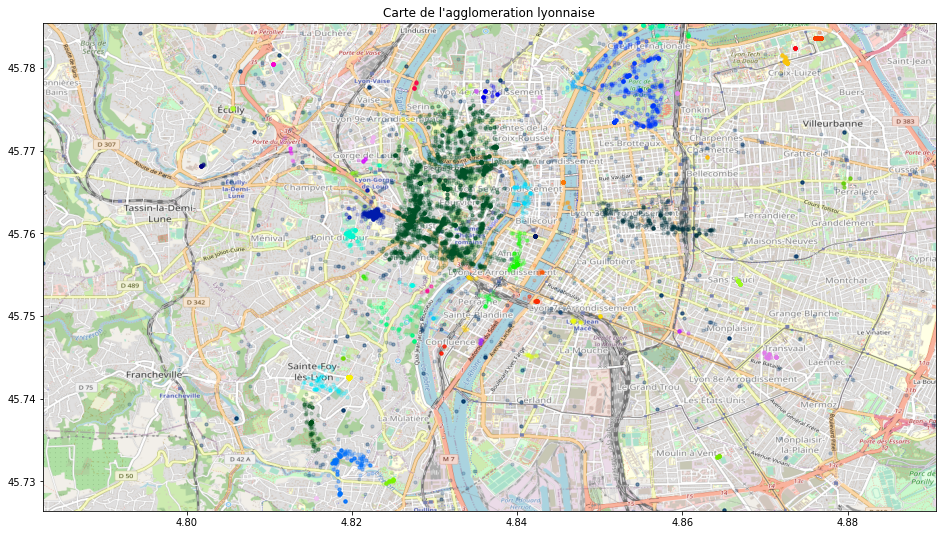

In [38]:

carte = plt.imread('./smaller_map.png')
fig, ax = plt.subplots(figsize = (16,14))
for key in ResultDict:
    ax.scatter(ResultDictLong[key], ResultDictLat[key], zorder=1, alpha= 0.2, color=colorsDict[key], s=10)
ax.set_title('Carte de l\'agglomeration lyonnaise')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(carte, zorder=0, extent = BBox, aspect= 'equal')

#### pysubgroup

In [39]:
print(datas.shape)
print(clustering.labels_.shape)
datas_columns = datas.columns
X = datas.values
tmp = []
for index in range(0,len(clustering.labels_)):
    tmp.append(np.append(X[index],clustering.labels_[index]))
clustered_datas = pd.DataFrame(data = tmp, columns = np.append(datas_columns,["cluster"]))
print(clustered_datas.head(4))
print(clustered_datas.shape)

(9687, 16)
(9687,)
            id           user        lat      long  \
0  22653655033   77161041@N00  45.768121  4.801776   
1  22884818287  113280318@N03  45.759700  4.842200   
2  23243740796  129394312@N07  45.763429  4.849875   
3  22642697483   19710808@N05  45.739289  4.814243   

                                                tags  \
0  square,sierra,squareformat,iphoneography,insta...   
1  square,squareformat,iphoneography,instagramapp...   
2  france,architecture,lyon,offices,appartments,i...   
3  orange,building,architecture,lyon,edificio,arc...   

                                               title  date_taken_minute  \
0             Enfin. #instabeer #beer #chimay #apero                 46   
1  https://www.facebook.com/PascalFrontiPhotograp...                  3   
2                         InCity, Lyon, France, 2015                 11   
3                                                NaN                 29   

   date_taken_hour  date_taken_day  date_taken_month 

In [43]:
target = ps.BinaryTarget ('cluster', 0)
searchspace = ps.create_selectors(clustered_datas, ignore=['cluster'])
task = ps.SubgroupDiscoveryTask (
    clustered_datas, 
    target, 
    searchspace, 
    result_set_size=5, 
    depth=2, 
    qf=ps.WRAccQF())
result = ps.BeamSearch().execute(task)

result.to_dataframe().head(40)

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,0.002829,lat: [45.77:45.78[ AND long<4.82,206.0,9687.0,28.0,28.0,9481.0,0.021266,0.978734,1.000000,0.000000,0.135922,0.000000,0.00289,47.024272
1,0.002366,long<4.82 AND user=='77161041@N00',29.0,9687.0,23.0,28.0,9658.0,0.002994,0.997006,0.821429,0.178571,0.793103,0.000518,0.00289,274.385468
2,0.002364,lat: [45.77:45.78[ AND user=='77161041@N00',34.0,9687.0,23.0,28.0,9653.0,0.003510,0.996490,0.821429,0.178571,0.676471,0.000518,0.00289,234.034664
3,0.002359,user=='77161041@N00',53.0,9687.0,23.0,28.0,9634.0,0.005471,0.994529,0.821429,0.178571,0.433962,0.000519,0.00289,150.135445
4,0.002312,long<4.82,1937.0,9687.0,28.0,28.0,7750.0,0.199959,0.800041,1.000000,0.000000,0.014455,0.000000,0.00289,5.001033


In [46]:
clustersDiff = np.copy(clustering.labels_)
clustersDiff = set(clustersDiff)
clustersDiff.remove(-1)
print(clustersDiff)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}


In [49]:
for clusterNumber in clustersDiff :
    target = ps.BinaryTarget ('cluster', clusterNumber)
    searchspace = ps.create_selectors(clustered_datas, ignore=['cluster'])
    task = ps.SubgroupDiscoveryTask (
        clustered_datas, 
        target, 
        searchspace, 
        result_set_size=5, 
        depth=2, 
        qf=ps.WRAccQF())
    result = ps.BeamSearch().execute(task)
    print("================= Cluster n°",clusterNumber,"=================")
    print(result.to_dataframe().head(40))
print("==================================================================")

================= Cluster n° 0 =================
    quality                                     subgroup  size_sg  \
0  0.002829             lat: [45.77:45.78[ AND long<4.82    206.0   
1  0.002366           long<4.82 AND user=='77161041@N00'     29.0   
2  0.002364  lat: [45.77:45.78[ AND user=='77161041@N00'     34.0   
3  0.002359                         user=='77161041@N00'     53.0   
4  0.002312                                    long<4.82   1937.0   

   size_dataset  positives_sg  positives_dataset  size_complement  \
0        9687.0          28.0               28.0           9481.0   
1        9687.0          23.0               28.0           9658.0   
2        9687.0          23.0               28.0           9653.0   
3        9687.0          23.0               28.0           9634.0   
4        9687.0          28.0               28.0           7750.0   

   relative_size_sg  relative_size_complement  coverage_sg  \
0          0.021266                  0.978734     1.000000 

================= Cluster n° 5 =================
    quality                                       subgroup  size_sg  \
0  0.050344               lat: [45.76:45.77[ AND long<4.82    536.0   
1  0.044743                                      long<4.82   1937.0   
2  0.042569                             lat: [45.76:45.77[   1938.0   
3  0.027873           date_upload_year==2014 AND long<4.82   1308.0   
4  0.027440  date_upload_year==2014 AND lat: [45.76:45.77[   1276.0   

   size_dataset  positives_sg  positives_dataset  size_complement  \
0        9687.0         518.0              548.0           9151.0   
1        9687.0         543.0              548.0           7750.0   
2        9687.0         522.0              548.0           7749.0   
3        9687.0         344.0              548.0           8379.0   
4        9687.0         338.0              548.0           8411.0   

   relative_size_sg  relative_size_complement  coverage_sg  \
0          0.055332                  0.944668  

================= Cluster n° 10 =================
    quality                                           subgroup  size_sg  \
0  0.001207                    lat<45.76 AND long: [4.82:4.83[    249.0   
1  0.001080  date_upload_minute: [34:47[ AND long: [4.82:4.83[    435.0   
2  0.001076          date_upload_minute: [34:47[ AND lat<45.76    462.0   
3  0.000995  date_upload_day<6 AND date_upload_minute: [34:47[    291.0   
4  0.000991                                  long: [4.82:4.83[   1936.0   

   size_dataset  positives_sg  positives_dataset  size_complement  \
0        9687.0          12.0               12.0           9438.0   
1        9687.0          11.0               12.0           9252.0   
2        9687.0          11.0               12.0           9225.0   
3        9687.0          10.0               12.0           9396.0   
4        9687.0          12.0               12.0           7751.0   

   relative_size_sg  relative_size_complement  coverage_sg  \
0          0.025705   

================= Cluster n° 15 =================
    quality                                       subgroup  size_sg  \
0  0.001311               lat: [45.77:45.78[ AND long<4.82    206.0   
1  0.001156                             lat: [45.77:45.78[   1937.0   
2  0.001053                                      long<4.82   1937.0   
3  0.001044           date_upload_year==2014 AND long<4.82   1308.0   
4  0.001019  date_upload_year==2014 AND lat: [45.77:45.78[   1471.0   

   size_dataset  positives_sg  positives_dataset  size_complement  \
0        9687.0          13.0               14.0           9481.0   
1        9687.0          14.0               14.0           7750.0   
2        9687.0          13.0               14.0           7750.0   
3        9687.0          12.0               14.0           8379.0   
4        9687.0          12.0               14.0           8216.0   

   relative_size_sg  relative_size_complement  coverage_sg  \
0          0.021266                  0.978734 

================= Cluster n° 20 =================
    quality                                    subgroup  size_sg  \
0  0.001326                     lat<45.76 AND long<4.82    801.0   
1  0.001156                                   lat<45.76   1937.0   
2  0.001156                                   long<4.82   1937.0   
3  0.000963  date_taken_year: [2014:2015[ AND lat<45.76   1157.0   
4  0.000951  date_taken_year: [2014:2015[ AND long<4.82   1235.0   

   size_dataset  positives_sg  positives_dataset  size_complement  \
0        9687.0          14.0               14.0           8886.0   
1        9687.0          14.0               14.0           7750.0   
2        9687.0          14.0               14.0           7750.0   
3        9687.0          11.0               14.0           8530.0   
4        9687.0          11.0               14.0           8452.0   

   relative_size_sg  relative_size_complement  coverage_sg  \
0          0.082688                  0.917312     1.000000   
1 

================= Cluster n° 25 =================
    quality                                        subgroup  size_sg  \
0  0.005331                 lat<45.76 AND long: [4.82:4.83[    249.0   
1  0.004378                               long: [4.82:4.83[   1936.0   
2  0.004377                                       lat<45.76   1937.0   
3  0.003728  date_upload_day: [17:23[ AND long: [4.82:4.83[    344.0   
4  0.003648          date_upload_day: [17:23[ AND lat<45.76    487.0   

   size_dataset  positives_sg  positives_dataset  size_complement  \
0        9687.0          53.0               53.0           9438.0   
1        9687.0          53.0               53.0           7751.0   
2        9687.0          53.0               53.0           7750.0   
3        9687.0          38.0               53.0           9343.0   
4        9687.0          38.0               53.0           9200.0   

   relative_size_sg  relative_size_complement  coverage_sg  \
0          0.025705                  0.9

================= Cluster n° 30 =================
    quality                              subgroup  size_sg  size_dataset  \
0  0.002576       lat<45.76 AND long: [4.84:4.86[    391.0        9687.0   
1  0.002147                             lat<45.76   1937.0        9687.0   
2  0.002144                     long: [4.84:4.86[   1949.0        9687.0   
3  0.001928  long: [4.84:4.86[ AND title.isnull()    120.0        9687.0   
4  0.001915          lat<45.76 AND title.isnull()    167.0        9687.0   

   positives_sg  positives_dataset  size_complement  relative_size_sg  \
0          26.0               26.0           9296.0          0.040363   
1          26.0               26.0           7750.0          0.199959   
2          26.0               26.0           7738.0          0.201197   
3          19.0               26.0           9567.0          0.012388   
4          19.0               26.0           9520.0          0.017240   

   relative_size_complement  coverage_sg  coverage_com

================= Cluster n° 35 =================
    quality                                           subgroup  size_sg  \
0  0.001619                    lat<45.76 AND long: [4.83:4.84[    189.0   
1  0.001397              date_taken_month: [7:9[ AND lat<45.76    285.0   
2  0.001364      date_taken_month: [7:9[ AND long: [4.83:4.84[    475.0   
3  0.001351         date_taken_year: [2014:2015[ AND lat<45.76   1157.0   
4  0.001347  date_taken_year: [2014:2015[ AND long: [4.83:4...   1184.0   

   size_dataset  positives_sg  positives_dataset  size_complement  \
0        9687.0          16.0               16.0           9498.0   
1        9687.0          14.0               16.0           9402.0   
2        9687.0          14.0               16.0           9212.0   
3        9687.0          15.0               16.0           8530.0   
4        9687.0          15.0               16.0           8503.0   

   relative_size_sg  relative_size_complement  coverage_sg  \
0          0.019511   

================= Cluster n° 40 =================
    quality                                           subgroup  size_sg  \
0  0.001094           lat: [45.76:45.77[ AND long: [4.84:4.86[    353.0   
1  0.000908                                 lat: [45.76:45.77[   1938.0   
2  0.000907                                  long: [4.84:4.86[   1949.0   
3  0.000786  date_upload_minute: [23:34[ AND lat: [45.76:45...    341.0   
4  0.000785    date_upload_hour: [18:21[ AND long: [4.84:4.86[    348.0   

   size_dataset  positives_sg  positives_dataset  size_complement  \
0        9687.0          11.0               11.0           9334.0   
1        9687.0          11.0               11.0           7749.0   
2        9687.0          11.0               11.0           7738.0   
3        9687.0           8.0               11.0           9346.0   
4        9687.0           8.0               11.0           9339.0   

   relative_size_sg  relative_size_complement  coverage_sg  \
0          0.036441   

================= Cluster n° 45 =================
    quality                             subgroup  size_sg  size_dataset  \
0  0.001466          lat<45.76 AND tags.isnull()    519.0        9687.0   
1  0.001415      lat<45.76 AND long: [4.83:4.84[    189.0        9687.0   
2  0.001367  long: [4.83:4.84[ AND tags.isnull()    488.0        9687.0   
3  0.001239                            lat<45.76   1937.0        9687.0   
4  0.001153                        tags.isnull()   2476.0        9687.0   

   positives_sg  positives_dataset  size_complement  relative_size_sg  \
0          15.0               15.0           9168.0          0.053577   
1          14.0               15.0           9498.0          0.019511   
2          14.0               15.0           9199.0          0.050377   
3          15.0               15.0           7750.0          0.199959   
4          15.0               15.0           7211.0          0.255600   

   relative_size_complement  coverage_sg  coverage_complemen

================= Cluster n° 50 =================
    quality                                           subgroup  size_sg  \
0  0.001718                   lat: [45.77:45.78[ AND long<4.82    206.0   
1  0.001567             date_taken_hour: [16:19[ AND long<4.82    470.0   
2  0.001548    date_taken_hour: [16:19[ AND lat: [45.77:45.78[    574.0   
3  0.001531         date_taken_year: [2014:2015[ AND long<4.82   1235.0   
4  0.001525  date_taken_year: [2014:2015[ AND lat: [45.77:4...   1269.0   

   size_dataset  positives_sg  positives_dataset  size_complement  \
0        9687.0          17.0               17.0           9481.0   
1        9687.0          16.0               17.0           9217.0   
2        9687.0          16.0               17.0           9113.0   
3        9687.0          17.0               17.0           8452.0   
4        9687.0          17.0               17.0           8418.0   

   relative_size_sg  relative_size_complement  coverage_sg  \
0          0.021266   

================= Cluster n° 55 =================
    quality                               subgroup  size_sg  size_dataset  \
0  0.007297               lat<45.76 AND long>=4.86    307.0        9687.0   
1  0.006513   date_upload_year==2014 AND lat<45.76   1315.0        9687.0   
2  0.006276  date_upload_year==2014 AND long>=4.86   1619.0        9687.0   
3  0.006029                              lat<45.76   1937.0        9687.0   
4  0.006027                             long>=4.86   1939.0        9687.0   

   positives_sg  positives_dataset  size_complement  relative_size_sg  \
0          73.0               73.0           9380.0          0.031692   
1          73.0               73.0           8372.0          0.135749   
2          73.0               73.0           8068.0          0.167131   
3          73.0               73.0           7750.0          0.199959   
4          73.0               73.0           7748.0          0.200165   

   relative_size_complement  coverage_sg  covera

================= Cluster n° 60 =================
    quality                                           subgroup  size_sg  \
0  0.000404                   lat: [45.77:45.78[ AND long<4.82    206.0   
1  0.000396           date_upload_day<6 AND lat: [45.77:45.78[    395.0   
2  0.000394                    date_upload_day<6 AND long<4.82    441.0   
3  0.000368  date_taken_year: [2014:2015[ AND date_upload_d...   1062.0   
4  0.000362       date_upload_day<6 AND date_upload_year==2014   1187.0   

   size_dataset  positives_sg  positives_dataset  size_complement  \
0        9687.0           4.0                4.0           9481.0   
1        9687.0           4.0                4.0           9292.0   
2        9687.0           4.0                4.0           9246.0   
3        9687.0           4.0                4.0           8625.0   
4        9687.0           4.0                4.0           8500.0   

   relative_size_sg  relative_size_complement  coverage_sg  \
0          0.021266   